In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("bikes_rent.csv")
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


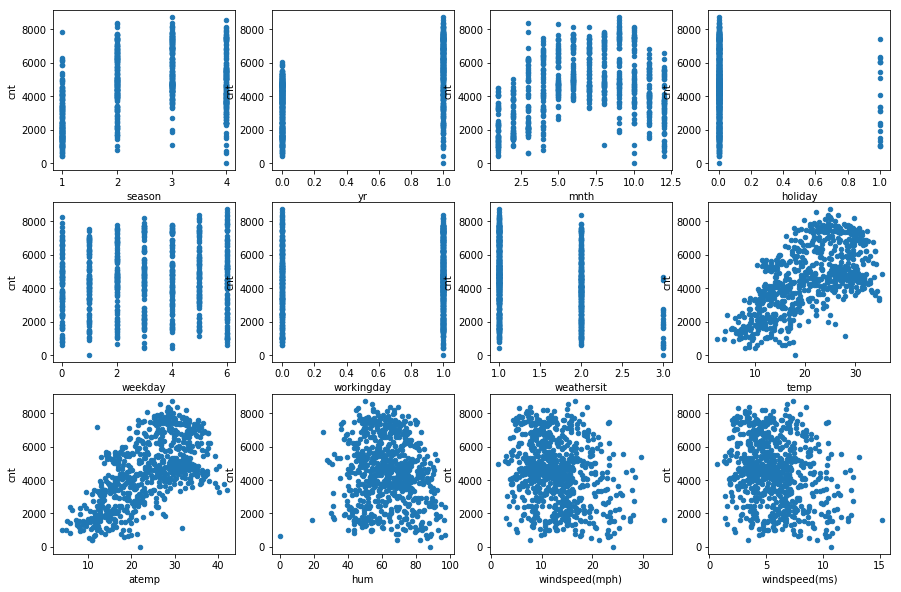

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### Каков характер зависимости числа прокатов от месяца?
Ответ: Исходя из диаграммы (1 строка, 3 столбец) можем заметить, что существует нелинейная зависимость вида y = a(x-b)^2 + c. Так же можно заметить, чем теплее становиться(июль) тем больше прокатов.

### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
Ответ:  Температура в цельсиях и в фаренгейтах, а также скорость ветра и в м\с и в мл\ч.

In [5]:
# Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода corrwith:
df.drop(labels='cnt',axis=1).corrwith(df.cnt)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [6]:
# Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
df.drop(labels=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit'], axis =1).corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [7]:
# Выведите средние признаков
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [8]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [9]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
Y = df_shuffled['cnt']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели 
# (веса хранятся в переменной coef_ класса регрессора).
# Можно выводить пары (название признака, вес), воспользовавшись функцией zip, встроенной в язык python
# Названия признаков хранятся в переменной df.columns
linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
for col, weight in zip(df.columns[:-1],linear_regressor.coef_):
    print(col, weight)
    

season 570.8681698112806
yr 1021.9637175294769
mnth -141.30232005185658
holiday -86.76357810238395
weekday 137.2291962130855
workingday 56.38823527436251
weathersit -330.2316126526911
temp 367.4749136050979
atemp 585.5563613048682
hum -145.60790584172227
windspeed(mph) 12458830091266.607
windspeed(ms) -12458830091465.062


In [12]:
from sklearn.linear_model import Lasso, Ridge

In [13]:
# Код 2.2 (0.5 балла)
# Обучите линейную модель с L1-регуляризацией и выведите веса
lasso_regressor = Lasso()
lasso_regressor.fit(X,Y)
for col, weight in zip(df.columns[:-1],lasso_regressor.coef_):
    print(col, weight)

season 560.241616030887
yr 1019.4634940657196
mnth -128.7306270367875
holiday -86.15278133371096
weekday 137.34789390496329
workingday 55.21237064135668
weathersit -332.3698569623488
temp 376.3632362096987
atemp 576.5307935045507
hum -144.12915500348595
windspeed(mph) -197.13968940248608
windspeed(ms) -2.8049652690829766e-08


In [14]:
# Код 2.3 (0.5 балла)
# Обучите линейную модель с L2-регуляризацией и выведите веса
ridge_regressor = Ridge()
ridge_regressor.fit(X,Y)
for col, weight in zip(df.columns[:-1],ridge_regressor.coef_):
    print(col, weight)

season 563.0645722520173
yr 1018.9483787875288
mnth -131.87332028247687
holiday -86.74609799709266
weekday 138.00511117871898
workingday 55.90311037506441
weathersit -332.3497884990723
temp 386.4578891919361
atemp 566.3470470600394
hum -145.07132729867294
windspeed(mph) -99.2594410817209
windspeed(ms) -99.25944115441256


In [15]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

In [16]:
#LASSO
for ind, val in enumerate(alphas):
    lasso_regr = Lasso(alpha = val)
    lasso_regr.fit(X,Y)
    coefs_lasso[ind] = lasso_regr.coef_

In [17]:
#RIDGE
for ind, val in enumerate(alphas):
    ridge_regr = Ridge(alpha = val)
    ridge_regr.fit(X,Y)
    coefs_ridge[ind] = ridge_regr.coef_

Text(0.5, 1.0, 'Ridge')

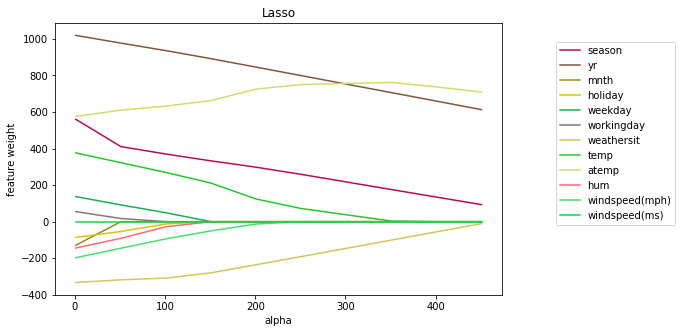

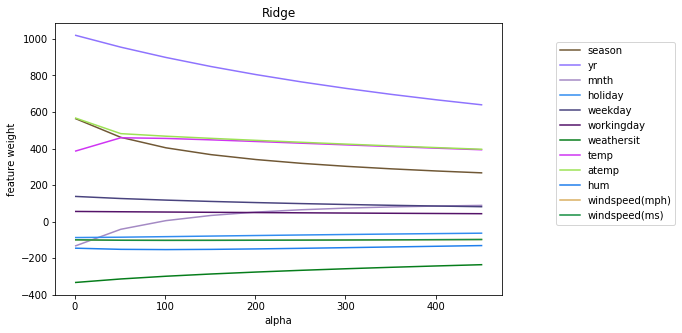

In [18]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

### Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
#### Ответ: Lasso

### Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
#### Ответ: Веса станут нулевыми. Так как мы решаем задачу минимизации Q(w,X) + alpha * ||w|| -> min, то чтобы данное выражение при большой альфе ушло в ноль нужно занулить слагаемое с ним.

### Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем < 1e-3.
#### Ответ: Да, как мы можем заметить Lasso исключает скорость ветра в метрах в секунду. Ridge не исключает.

### Какой из регуляризаторов подойдет для отбора неинформативных признаков?
#### Ответ: Lasso.

In [19]:
from sklearn.linear_model import LassoCV

ALPHA =  6
WEIGHTS:
season 532.0189828413537
yr 1015.0602226430597
mnth -100.03952614356626
holiday -83.29395987529917
weekday 132.50446549095795
workingday 51.55708561407389
weathersit -330.5598567399813
temp 370.6798550300351
atemp 581.3969310654967
hum -140.0074055006887
windspeed(mph) -191.77140847135064
windspeed(ms) -2.6854518176296607e-08


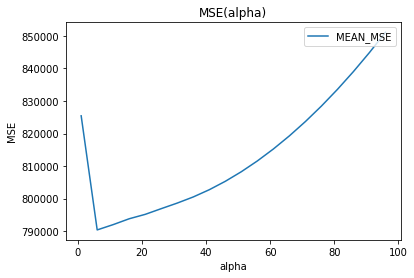

In [20]:
# Код 3.2 (1 балл)
# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов
#-----------------------------------------Обучение----------------------------------------------------------------------------#
alphas = np.arange(1, 100, 5)
lassoCV_regressor = LassoCV(cv = 3, alphas=alphas)
lassoCV_regressor.fit(X,Y)
#-------------------------------------------График----------------------------------------------------------------------------#
plt.figure()
plt.plot(lassoCV_regressor.alphas_,lassoCV_regressor.mse_path_.mean(axis=1), label="MEAN_MSE")
plt.legend(loc="upper right")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("MSE(alpha)")
#-----------------------------------------ALPHA AND WEIGHTS--------------------------------------------------------------------#
print("ALPHA = ",lassoCV_regressor.alpha_)
print("WEIGHTS:")
for col, weight in zip(df.columns[:-1], lassoCV_regressor.coef_):
    print(col, weight)


alpha =  41
alpha =  6
alpha =  1


array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

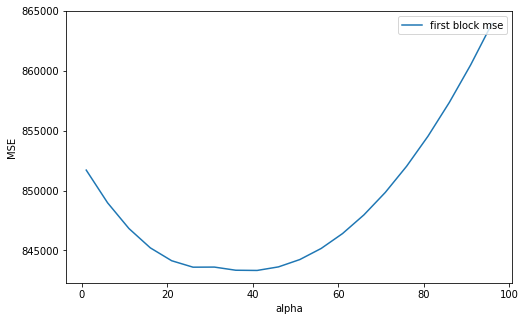

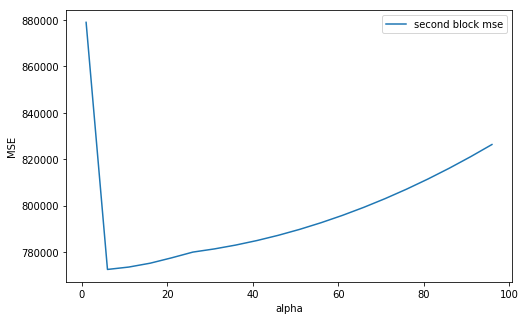

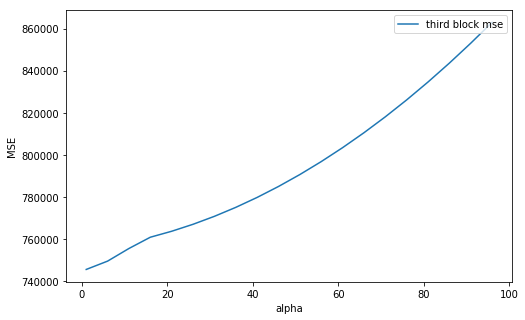

In [31]:
# Код 3.3 (1 балл)
# Выведите значения alpha, соответствующие минимумам MSE на каждом разбиении (то есть по столбцам).
# На трех отдельных графиках визуализируйте столбцы .mse_path_
#-----------------------------------------Alphas------------------------------------------------------------------------------#
for i in lassoCV_regressor.mse_path_.argmin(axis=0):
    print("alpha = ", lassoCV_regressor.alphas_[i])
#-----------------------------------------Графики------------------------------------------------------------------------------#
mse_transposed = lassoCV_regressor.mse_path_.transpose()

plt.figure(figsize=(8, 5))
plt.plot(lassoCV_regressor.alphas_,mse_transposed[0], label='first block mse')
plt.legend(loc='upper right')
plt.xlabel('alpha')
plt.ylabel('MSE')

plt.figure(figsize=(8, 5))
plt.plot(lassoCV_regressor.alphas_,mse_transposed[1], label='second block mse')
plt.legend(loc='upper right')
plt.xlabel('alpha')
plt.ylabel('MSE')

plt.figure(figsize=(8, 5))
plt.plot(lassoCV_regressor.alphas_,mse_transposed[2], label='third block mse')
plt.legend(loc='upper right')
plt.xlabel('alpha')
plt.ylabel('MSE')

### В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей cnt от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость cnt от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды?
#### Ответ: 4 признака - season, yr, atemp, temp. Да, видна. Нет, не логично, тк год от года количество может меняться, также при слишком высокой температуре люди тоже вряд ли будут брать велосипеды.

### Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?
#### Ответ: 3 признака - weathersit, windspeed(mph), hum.  В случае с влажностью и погодными условиями она четко заметна, а вот в случае со скоростью ветра, видно слабее. Да, так можно утверждать.

### Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?
#### Ответ: наша модель исключила только скорость ветра в м\с,  в случае когда у нас даны две скорости ветра в разных единицах, то это считается верным, и этот признак действительно будет неважен для нас, но если бы он был единственным, то он бы не занулился и влиял на спрос.